#Segunda Parte do Projeto:

###Importação das bibliotecas:

In [110]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno

###Carregando conjunto de dados:

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datascience/datasets/df_final.csv")

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5353 non-null   int64  
 1   genres                5353 non-null   object 
 2   homepage              2102 non-null   object 
 3   id                    5353 non-null   float64
 4   keywords              5353 non-null   object 
 5   original_language     5353 non-null   object 
 6   original_title        5353 non-null   object 
 7   overview              5350 non-null   object 
 8   popularity            5353 non-null   float64
 9   production_companies  5353 non-null   object 
 10  production_countries  5353 non-null   object 
 11  release_date          5352 non-null   object 
 12  revenue               5353 non-null   int64  
 13  runtime               5351 non-null   float64
 14  spoken_languages      5353 non-null   object 
 15  status               

###Informação estatística:

In [5]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.353000e+03,5353.000000,5353.000000,5.353000e+03,5351.000000,5353.000000,5353.000000
mean,2.776581e+07,111178.287129,36.062382,7.710544e+07,106.528873,6.136391,713.720531
std,4.116110e+07,186090.714529,260.475179,1.596430e+08,22.269636,1.198828,1268.053435
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,9488.000000,5.251143,0.000000e+00,93.000000,5.600000,57.000000
50%,1.200000e+07,19153.000000,14.086292,1.410928e+07,103.000000,6.300000,240.000000
75%,3.700000e+07,103370.000000,30.387754,8.414683e+07,117.000000,6.900000,766.000000
max,3.800000e+08,874562.000000,13195.451000,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
df.describe(include="O")

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew
count,5353,2102,5353,5353,5353,5350,5353,5353,5352,5353,5353,4380,5353,5353,5353
unique,1426,2071,4651,38,5329,5340,4216,537,3566,620,3,4347,5327,5301,5318
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,[],en,Snake Eyes,"In a time when monsters walk the Earth, humani...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2021-09-10,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Justice is coming.,The Grudge,[],[]
freq,370,4,523,5049,2,2,359,2977,10,3171,5345,3,2,45,28


###Dicionário de Dados:

In [7]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

*   **budget**: Orçamento do Filmes em Dólares
*   **genres**: Lista de Dicionários com todos os gêneros associados ao filme
*   **homepage**: Site oficial do filme
*   **id**: Identificação (ID) do filme
*   **keywords**: Palavras chaves associadas ao filme
*   **original_language**: Idioma original do filme
*   **original_title**: Título original do filme
*   **overview**: Breve descrição do filme
*   **popularity**: Pontuação dada pelo TMDB
*   **production_companies**: Produtoras envolvidas na produção do filme
*   **release_data**: Data de Lançamento do Filme
*   **revenue**: Receita Total do filme em dólares
*   **runtime**: Tempo de execução do filme em minutos
*   **spoken_language**: Idiomas falados no filme
*   **status**: Status do filme (lançado, para ser lançado, anunciado, etc)
*   **tagline**: Tagline do filme
*   **title**: Título oficial do filme
*   **vote_average**: Avaliação média do filme
*   **vote_count**: Número de votos contabilizados pelo TMDB
*   **cast**: Elenco do filme
*   **crew**: Equipe Técnica



###Dados Faltantes:

In [8]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3251
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  973
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

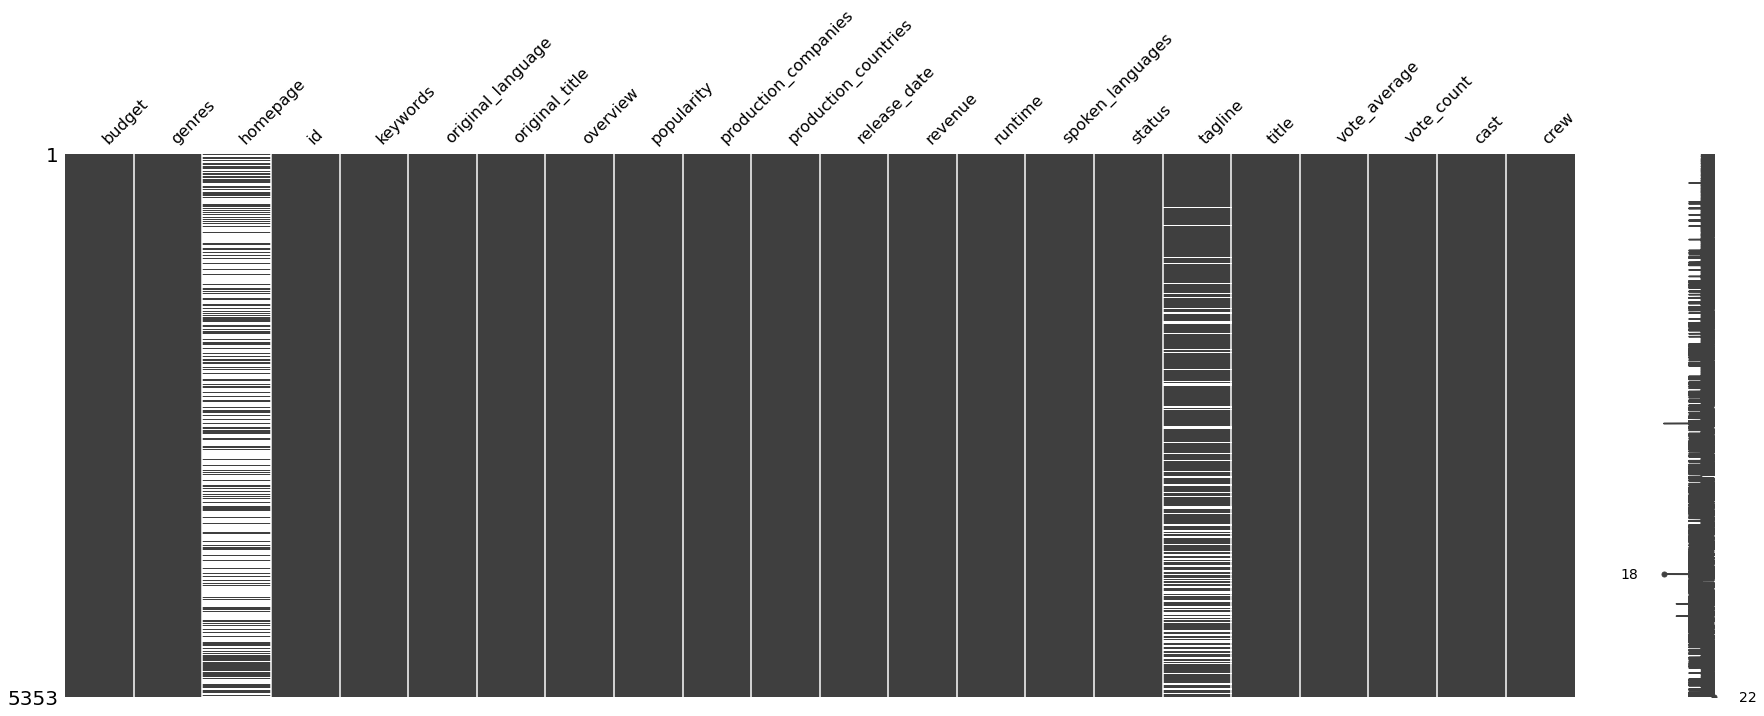

In [9]:
missingno.matrix(df, figsize=(30,10))

In [10]:
df.isnull().sum().sort_values(ascending=False)

homepage                3251
tagline                  973
overview                   3
runtime                    2
release_date               1
crew                       0
popularity                 0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
production_countries       0
production_companies       0
cast                       0
revenue                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
budget                     0
dtype: int64

In [11]:
df[df.isnull().any(axis=1)].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452.0,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400,"[{""cast_id"": 3, ""character"": ""Superman / Clark...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de..."
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...","[{""iso_3166_1"": ""CZ"", ""name"": ""Czech Republic""...",2008-05-15,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630,"[{""cast_id"": 1, ""character"": ""Prince Caspian"",...","[{""credit_id"": ""55a239e69251412979002e8b"", ""de..."
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,254.0,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...","[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2005-12-14,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337,"[{""cast_id"": 5, ""character"": ""Ann Darrow"", ""cr...","[{""credit_id"": ""52fe422ec3a36847f800a1d7"", ""de..."
27,209000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,44833.0,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 4410, ""...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-11,303025485,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114,"[{""cast_id"": 3, ""character"": ""Lieutenant Alex ...","[{""credit_id"": ""52fe469ec3a36847f8108d45"", ""de..."
33,210000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,36668.0,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 8828, ...",en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2006-05-24,459359555,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525,"[{""cast_id"": 4, ""character"": ""Logan / Wolverin...","[{""credit_id"": ""538d82720e0a26670e005e83"", ""de..."


In [12]:
linhas, colunas = df.shape

In [13]:
faltantes_percentual = (df.isnull().sum()/linhas) * 100

##Dados Duplicados:

In [14]:
df[df.duplicated()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
5155,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",https://www.godzillavskong.net/,399566.0,"[{'id': 11100, 'name': 'giant monster'}, {'id'...",en,Godzilla vs. Kong,"In a time when monsters walk the Earth, humani...",544.312,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-03-24,467863133,113.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One Will Fall,Godzilla vs. Kong,7.8,7532,"[{'adult': False, 'gender': 2, 'id': 28846, 'k...","[{'adult': False, 'gender': 2, 'id': 1706, 'kn..."
5201,61000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.aquietplacemovie.com,520763.0,"[{'id': 2041, 'name': 'island'}, {'id': 4305, ...",en,A Quiet Place Part II,"Following the events at home, the Abbott famil...",316.703,"[{'id': 4, 'logo_path': '/fycMZt242LVjagMByZOL...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-05-21,297372261,97.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Silence is not enough.,A Quiet Place Part II,7.6,3804,"[{'adult': False, 'gender': 1, 'id': 5081, 'kn...","[{'adult': False, 'gender': 1, 'id': 555, 'kno..."
5232,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",https://www.thefastsaga.com,385128.0,"[{'id': 3428, 'name': 'speed'}, {'id': 9663, '...",en,F9,Dominic Toretto and his crew battle the most s...,663.530,"[{'id': 333, 'logo_path': '/5xUJfzPZ8jWJUDzYtI...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-05-19,721077945,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Justice is coming.,F9,7.4,4865,"[{'adult': False, 'gender': 2, 'id': 12835, 'k...","[{'adult': False, 'gender': 1, 'id': 2519, 'kn..."
5251,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.marvel.com/movies/black-widow,497698.0,"[{'id': 470, 'name': 'spy'}, {'id': 782, 'name...",en,Black Widow,"Natasha Romanoff, also known as Black Widow, c...",581.175,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-07-07,378328978,134.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Her world. Her secrets. Her legacy.,Black Widow,7.5,6813,"[{'adult': False, 'gender': 1, 'id': 1245, 'kn...","[{'adult': False, 'gender': 1, 'id': 1245, 'kn..."
5272,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://movies.disney.com/jungle-cruise,451048.0,"[{'id': 10787, 'name': 'jungle'}, {'id': 15824...",en,Jungle Cruise,Dr. Lily Houghton enlists the aid of wisecrack...,576.480,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-07-28,217000000,127.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Jungle Cruise,7.6,3854,"[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 8221, 'kn..."
5289,110000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...",https://www.20thcenturystudios.com/movies/free...,550988.0,"[{'id': 282, 'name': 'video game'}, {'id': 141...",en,Free Guy,A bank teller called Guy realizes he is a back...,818.018,"[{'id': 27711, 'logo_path': '/3e294jszfE6cE8TO...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-08-11,331096766,115.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Life's too short to be a background character.,Free Guy,7.7,4716,"[{'adult': False, 'gender': 2, 'id': 10859, 'k...","[{'adult': False, 'gender': 1, 'id': 1720, 'kn..."
5314,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.marvel.com/movies/shang-chi-and-th...,566525.0,"[{'id': 779, 'name': 'martial arts'}, {'id': 9...",en,Shang-Chi and the Legend of the Ten Rings,Shang-Chi must confront the past he thought he...,207

##Análise de cada feature:

###Budget - Orçamento (em $):

In [15]:
df["budget"].head()

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

In [16]:
type(df["budget"])

pandas.core.series.Series

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
df["budget"].dtypes

dtype('int64')

In [19]:
df["budget"].describe().round(2)

count    5.353000e+03
mean     2.776581e+07
std      4.116110e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.200000e+07
75%      3.700000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [20]:
df['budget'].max()

380000000

In [21]:
df['budget'].std()

41161096.009895295

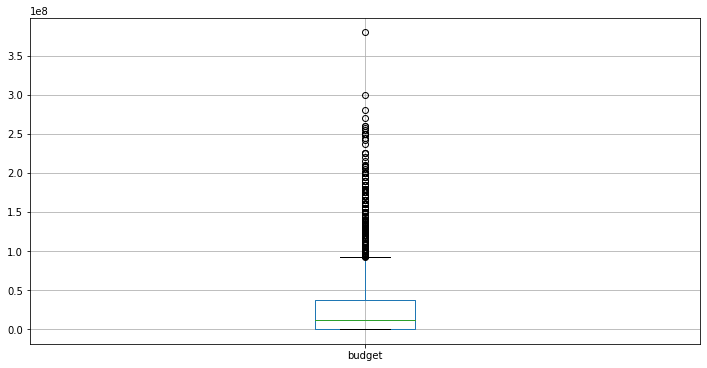

In [22]:
plt.figure(figsize=(12,6))
df.boxplot('budget')
plt.show()

###Genres:

In [23]:
df["genres"].head(5)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [24]:
type(df["genres"])

pandas.core.series.Series

In [25]:
df["genres"].dtypes

dtype('O')

###Homepage:

In [26]:
df["homepage"].head()

0                     http://www.avatarmovie.com/
1    http://disney.go.com/disneypictures/pirates/
2     http://www.sonypictures.com/movies/spectre/
3              http://www.thedarkknightrises.com/
4            http://movies.disney.com/john-carter
Name: homepage, dtype: object

In [27]:
df["homepage"].dtypes

dtype('O')

In [28]:
df.isnull().sum().sort_values(ascending=False)

homepage                3251
tagline                  973
overview                   3
runtime                    2
release_date               1
crew                       0
popularity                 0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
production_countries       0
production_companies       0
cast                       0
revenue                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
budget                     0
dtype: int64

###Id - identificação dos filmes:

In [29]:
df["id"].head()

0     19995.0
1       285.0
2    206647.0
3     49026.0
4     49529.0
Name: id, dtype: float64

In [30]:
df["id"].dtypes

dtype('float64')

### keywords - Palavras chaves associadas ao filme:


In [31]:
df["keywords"].head()

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
3    [{"id": 849, "name": "dc comics"}, {"id": 853,...
4    [{"id": 818, "name": "based on novel"}, {"id":...
Name: keywords, dtype: object

In [32]:
df["keywords"].dtypes

dtype('O')

###original_language - a língua original do filme:

In [33]:
df["original_language"].head()

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

In [34]:
df["original_language"].nunique()

38

In [35]:
df["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el', 'la'], dtype=object)

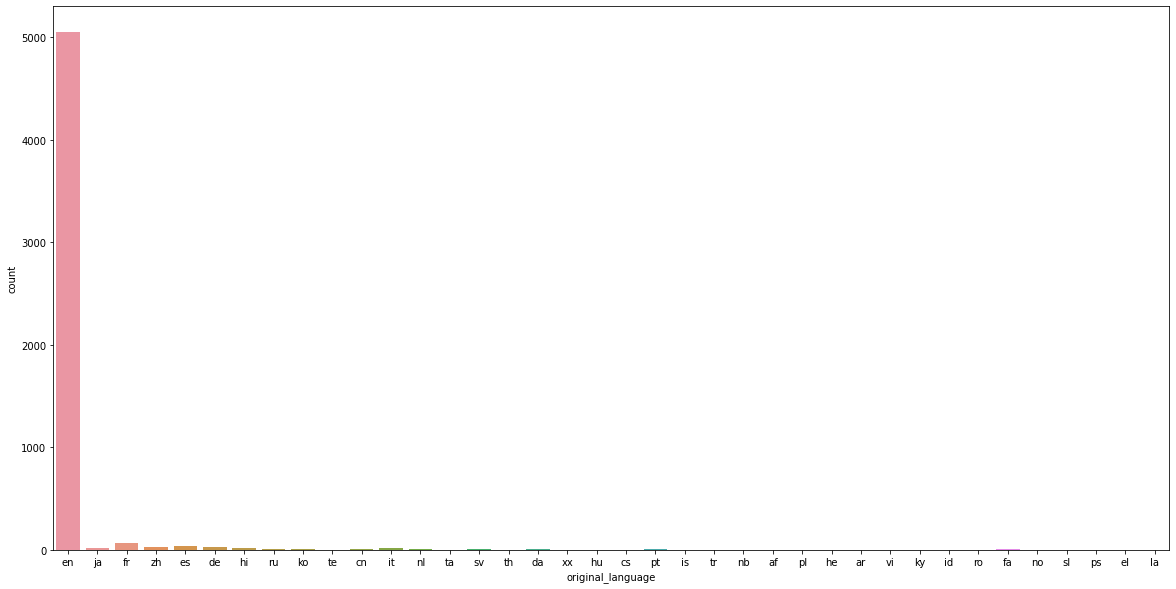

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x = "original_language", data=df)
plt.show()

In [37]:
df["original_language"].value_counts()

en    5049
fr      72
es      34
zh      27
de      27
hi      19
ja      16
it      15
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
cs       2
ta       2
ar       2
ro       2
af       1
ky       1
tr       1
sl       1
el       1
no       1
xx       1
te       1
ps       1
la       1
nb       1
pl       1
vi       1
hu       1
is       1
Name: original_language, dtype: int64

In [38]:
df["original_language"].describe()

count     5353
unique      38
top         en
freq      5049
Name: original_language, dtype: object

###original_title - Título original dos filmes:

In [39]:
df["original_title"].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: original_title, dtype: object

In [40]:
df["original_title"].dtypes

dtype('O')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5353 non-null   int64  
 1   genres                5353 non-null   object 
 2   homepage              2102 non-null   object 
 3   id                    5353 non-null   float64
 4   keywords              5353 non-null   object 
 5   original_language     5353 non-null   object 
 6   original_title        5353 non-null   object 
 7   overview              5350 non-null   object 
 8   popularity            5353 non-null   float64
 9   production_companies  5353 non-null   object 
 10  production_countries  5353 non-null   object 
 11  release_date          5352 non-null   object 
 12  revenue               5353 non-null   int64  
 13  runtime               5351 non-null   float64
 14  spoken_languages      5353 non-null   object 
 15  status               

In [42]:
df["original_title"].nunique()

5329

In [43]:
df["original_title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'The Guilty', 'Birds of Paradise', 'After We Fell'],
      dtype=object)

In [44]:
df["original_title"].count()

5353

In [45]:
df["original_title"].describe()

count           5353
unique          5329
top       Snake Eyes
freq               2
Name: original_title, dtype: object

###Overview - Breve descrição dos filmes:

In [46]:
df["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [47]:
df["overview"].nunique()

5340

In [48]:
df["overview"].shape

(5353,)

In [49]:
df["overview"].describe()

count                                                  5350
unique                                                 5340
top       In a time when monsters walk the Earth, humani...
freq                                                      2
Name: overview, dtype: object

In [50]:
df["overview"].dtypes

dtype('O')

###Popularity - pontuação dada pelo TMDB:

In [51]:
df["popularity"].head()

0    150.437577
1    139.082615
2    107.376788
3    112.312950
4     43.926995
Name: popularity, dtype: float64

In [52]:
df["popularity"].dtypes

dtype('float64')

In [53]:
df["popularity"].describe()

count     5353.000000
mean        36.062382
std        260.475179
min          0.000000
25%          5.251143
50%         14.086292
75%         30.387754
max      13195.451000
Name: popularity, dtype: float64

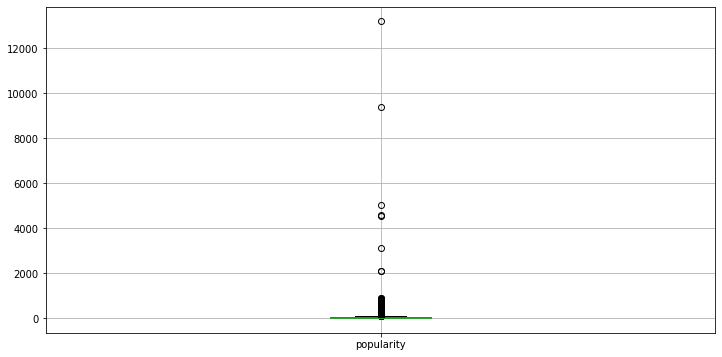

In [54]:
plt.figure(figsize=(12,6))
df.boxplot('popularity')
plt.show()

###Production Companies - Produtoras dos filmes listados:

In [55]:
df["production_companies"].head()

0    [{"name": "Ingenious Film Partners", "id": 289...
1    [{"name": "Walt Disney Pictures", "id": 2}, {"...
2    [{"name": "Columbia Pictures", "id": 5}, {"nam...
3    [{"name": "Legendary Pictures", "id": 923}, {"...
4          [{"name": "Walt Disney Pictures", "id": 2}]
Name: production_companies, dtype: object

In [56]:
df["production_companies"].dtypes

dtype('O')

In [57]:
df["production_companies"].describe()

count     5353
unique    4216
top         []
freq       359
Name: production_companies, dtype: object

###Release_date - Data de Lançamento do filme:

In [58]:
df["release_date"].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [59]:
df["release_date"].dtypes

dtype('O')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5353 non-null   int64  
 1   genres                5353 non-null   object 
 2   homepage              2102 non-null   object 
 3   id                    5353 non-null   float64
 4   keywords              5353 non-null   object 
 5   original_language     5353 non-null   object 
 6   original_title        5353 non-null   object 
 7   overview              5350 non-null   object 
 8   popularity            5353 non-null   float64
 9   production_companies  5353 non-null   object 
 10  production_countries  5353 non-null   object 
 11  release_date          5352 non-null   object 
 12  revenue               5353 non-null   int64  
 13  runtime               5351 non-null   float64
 14  spoken_languages      5353 non-null   object 
 15  status               

In [61]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                5353 non-null   int64         
 1   genres                5353 non-null   object        
 2   homepage              2102 non-null   object        
 3   id                    5353 non-null   float64       
 4   keywords              5353 non-null   object        
 5   original_language     5353 non-null   object        
 6   original_title        5353 non-null   object        
 7   overview              5350 non-null   object        
 8   popularity            5353 non-null   float64       
 9   production_companies  5353 non-null   object        
 10  production_countries  5353 non-null   object        
 11  release_date          5352 non-null   datetime64[ns]
 12  revenue               5353 non-null   int64         
 13  runtime           

In [63]:
df["release_date"].dtypes

dtype('<M8[ns]')

In [64]:
df["release_date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    5352
unique                   3566
top       2021-09-10 00:00:00
freq                       10
first     1916-09-04 00:00:00
last      2021-12-18 00:00:00
Name: release_date, dtype: object

In [65]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [66]:
df[df["release_date"] == "2021-10-28 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


In [67]:
df[df["release_date"] == "1913-05-01 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


###Revenue - Receita total do filme (em $):

In [68]:
df["revenue"].head()

0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

In [69]:
df["revenue"].describe().round(2)

count    5.353000e+03
mean     7.710544e+07
std      1.596430e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.410928e+07
75%      8.414683e+07
max      2.787965e+09
Name: revenue, dtype: float64

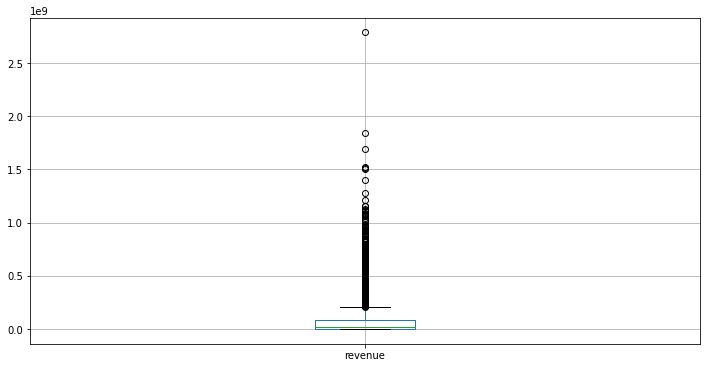

In [70]:
plt.figure(figsize=(12,6))
df.boxplot("revenue")
plt.show()

###Runtime - tempo de execução do filmes em horas e minutos:

In [71]:
df["runtime"].head()

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [72]:
df["runtime"].dtypes

dtype('float64')

In [73]:
df["runtime"].describe()

count    5351.000000
mean      106.528873
std        22.269636
min         0.000000
25%        93.000000
50%       103.000000
75%       117.000000
max       338.000000
Name: runtime, dtype: float64

In [74]:
df.isnull().sum().sort_values(ascending=False)

homepage                3251
tagline                  973
overview                   3
runtime                    2
release_date               1
crew                       0
popularity                 0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
production_countries       0
production_companies       0
cast                       0
revenue                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
budget                     0
dtype: int64

In [75]:
df[df["runtime"] == 338.000000]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
2384,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,43434.0,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2010-05-19,871279,338.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,The man who hijacked the world,Carlos,6.7,50,"[{""cast_id"": 4, ""character"": ""Ilich Ram\u00edr...","[{""credit_id"": ""57352b61c3a3680253000870"", ""de..."


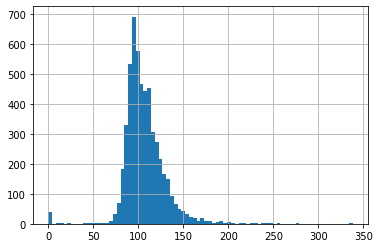

In [76]:
df["runtime"].hist(bins=80)

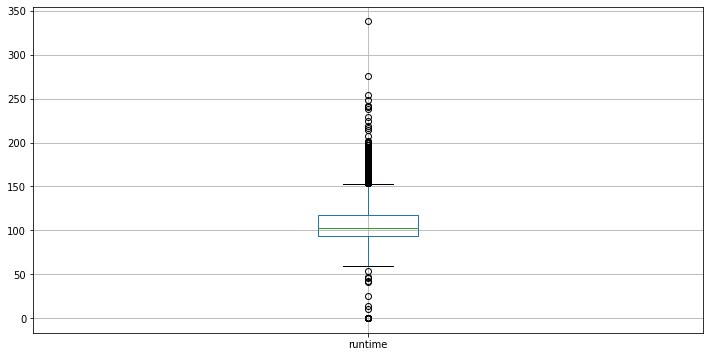

In [77]:
plt.figure(figsize=(12,6))
df.boxplot("runtime")
plt.show()

###Spoken_language - Línguas faladas no filme:

In [78]:
df["spoken_languages"].head()

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3             [{"iso_639_1": "en", "name": "English"}]
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

In [79]:
df["spoken_languages"].dtypes

dtype('O')

###Status - Status do filme (lançado, para ser lançado, anunciado, etc...)

In [80]:
df["status"].head()

0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

In [81]:
df["status"].nunique()

3

In [82]:
df["status"].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [83]:
df["status"].value_counts()

Released           5345
Rumored               5
Post Production       3
Name: status, dtype: int64

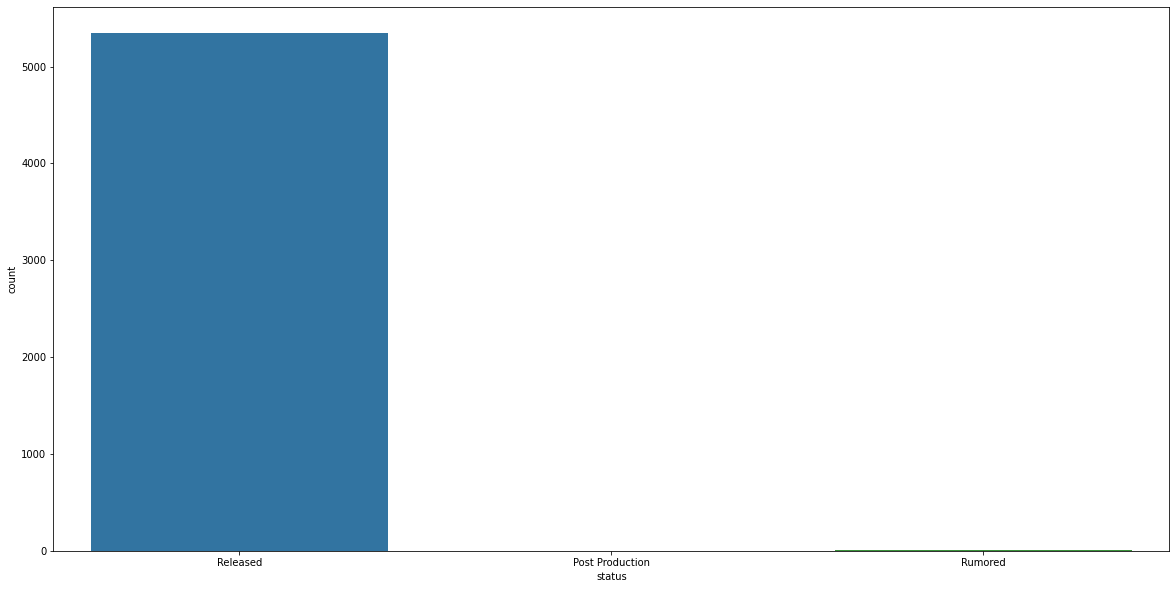

In [84]:
plt.figure(figsize = (20,10))
sns.countplot(x="status", data=df)
plt.show()

###Tagline - Tagline do filme:

In [85]:
df["tagline"].head()

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object

In [86]:
df['tagline'].describe()

count                   4380
unique                  4347
top       Justice is coming.
freq                       3
Name: tagline, dtype: object

Title - Título oficial do Filme:

In [87]:
df['title'].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: title, dtype: object

In [88]:
df["title"].dtypes

dtype('O')

In [89]:
df["title"].nunique()

5327

In [90]:
df["title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'The Guilty', 'Birds of Paradise', 'After We Fell'],
      dtype=object)

###Vote_average - Avaliação média do filme

In [91]:
df['vote_average'].head()

0    7.2
1    6.9
2    6.3
3    7.6
4    6.1
Name: vote_average, dtype: float64

In [92]:
df['vote_average'].dtypes

dtype('float64')

In [93]:
df['vote_average'].describe()

count    5353.000000
mean        6.136391
std         1.198828
min         0.000000
25%         5.600000
50%         6.300000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64

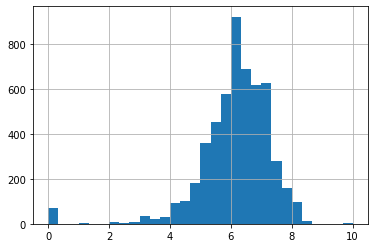

In [94]:
df['vote_average'].hist(bins=30)

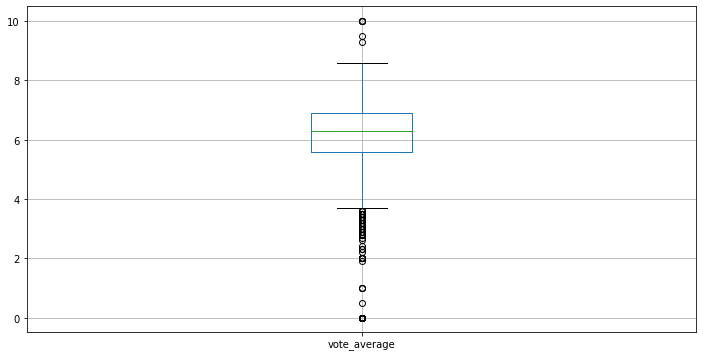

In [95]:
plt.figure(figsize=(12,6))
df.boxplot("vote_average")
plt.show()

In [96]:
df[df["vote_average"] == 10.0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861.0,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,"[{""cast_id"": 11, ""character"": ""Emily"", ""credit...","[{""credit_id"": ""52fe4a2f9251416c910c5edb"", ""de..."
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373.0,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,"[{""cast_id"": 1, ""character"": ""Keller Coleman"",...","[{""credit_id"": ""52fe499bc3a368484e13445b"", ""de..."
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505.0,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,[],[]
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963.0,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]


In [97]:
df[df["vote_average"] == 0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706.0,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0,"[{""cast_id"": 4, ""character"": ""Jack"", ""credit_i...","[{""credit_id"": ""5500016ac3a3685b9900106a"", ""de..."
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406.0,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0,"[{""cast_id"": 4, ""character"": ""Joey"", ""credit_i...","[{""credit_id"": ""5617d84d92514166e2001e21"", ""de..."
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027.0,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0,[],[]
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766.0,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0,"[{""cast_id"": 0, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""586756379251413e4c006618"", ""de..."
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662.0,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""565d1089c3a368758d001059"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,839017.0,[],en,DOMINO: Battle of the Bones,"Hoping to reclaim his former glory, a fallen d...",1.537000,[],[],2021-06-11,0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Domino: Battle Of The Bones,0.0,0,"[{'adult': False, 'gender': 2, 'id': 15234, 'k...","[{'adult': False, 'gender': 2, 'id': 942302, '..."
5230,0,"[{'id': 99, 'name': 'Documentary'}]",http://acrimeonthebayou.com,763040.0,[],en,A Crime on the Bayou,A Crime on the Bayou is the story of Gary Dunc...,1.044000,"[{'id': 152942, 'logo_path': None, 'name': 'Au...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-06-18,0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,A Crime on the Bayou,0.0,0,[],"[{'adult': False, 'gender': 2, 'id': 18747, 'k..."
5288,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.hulu.com/movie/homeroom-3ba54579-2...,776523.0,"[{'id': 3687, 'name': 'graduation'}, {'id': 11...",en,Homeroom,Following the class of 2020 at Oakland High Sc...,3.149000,"[{'id': 125345, 'logo_path': None, 'name': 'Co...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-01-29,0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This is not a test.,Homeroom,0.0,0,"[{'adult': False, 'gender': 0, 'id': 3169457, ...","[{'adult': False, 'gender': 2, 'id'

###Vote_count - número de votos contabilizados pelo TMDB:

In [98]:
df['vote_count'].head()

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

In [99]:
df['vote_count'].dtypes

dtype('int64')

In [100]:
df['vote_count'].describe()

count     5353.000000
mean       713.720531
std       1268.053435
min          0.000000
25%         57.000000
50%        240.000000
75%        766.000000
max      13752.000000
Name: vote_count, dtype: float64

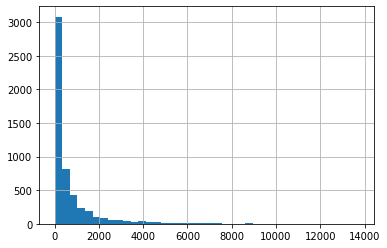

In [101]:
df['vote_count'].hist(bins=40)

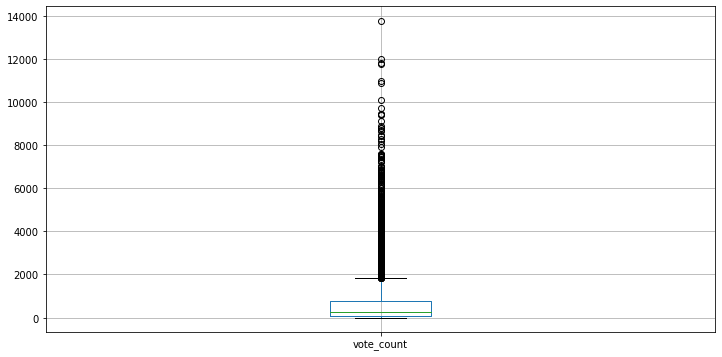

In [102]:
plt.figure(figsize=(12,6))
df.boxplot("vote_count")
plt.show()

In [103]:
df[df["vote_count"] == 22907.000000]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


In [104]:
q1 = df["vote_count"].quantile(0.25)
q3 = df["vote_count"].quantile(0.75)
IQR = q3 - q1
print(IQR)

709.0


###Cast - Elenco do filme:

In [105]:
df["cast"].head()

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

In [106]:
df["cast"].dtypes

dtype('O')

###Crew - Equipe técnica do filme:

In [107]:
df["crew"].head()

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object

In [108]:
df["crew"].dtypes

dtype('O')

##Analisando e interpretando as features (colunas):

###Análise 1: Qual o retorno de cada filme?

In [111]:
df['budget'] = pd.to_numeric(df["budget"], errors="coerce")
df["budget"] = df["budget"].replace(0, np.nan)

In [112]:
df["return"]  = df["revenue"]/df["budget"]

In [113]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843


In [114]:
df.head().transpose()

,0,1,2,3,4
budget,2.37e+08,3e+08,2.45e+08,2.5e+08,2.6e+08
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.438,139.083,107.377,112.313,43.927
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


In [115]:
df[df["return"] < 1 ]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
13,255000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://disney.go.com/the-lone-ranger/,57201.0,"[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-07-03,89289910,149.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never Take Off the Mask,The Lone Ranger,5.9,2311,"[{""cast_id"": 4, ""character"": ""Tonto"", ""credit_...","[{""credit_id"": ""52fe4928c3a36847f818be95"", ""de...",0.350157
73,175000000.0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",http://www.evanalmighty.com/,2698.0,"[{""id"": 494, ""name"": ""father son relationship""...",en,Evan Almighty,God contacts Congressman Evan Baxter and tells...,27.082182,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-06-09,173000000,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A comedy of biblical proportions,Evan Almighty,5.3,1151,"[{""cast_id"": 19, ""character"": ""Evan Baxter"", ""...","[{""credit_id"": ""52fe4365c3a36847f805145d"", ""de...",0.988571
83,27000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698.0,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34,"[{""cast_id"": 11, ""character"": ""James Stewart /...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de...",0.000000
84,175000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",NaN,64686.0,"[{""id"": 233, ""name"": ""japan""}, {""id"": 236, ""na...",en,47 Ronin,"Based on the original 1941 movie from Japan, a...",41.796339,"[{""name"": ""Mid Atlantic Films"", ""id"": 2735}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-12-06,150962475,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,For courage. For loyalty. For honor.,47 Ronin,5.9,1326,"[{""cast_id"": 1001, ""character"": ""Kai"", ""credit...","[{""credit_id"": ""52fe46e4c3a368484e0a98ef"", ""de...",0.862643
135,150000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978.0,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,"[{""cast_id"": 3, ""character"": ""Lawrence Talbot""...","[{""credit_id"": ""538aeb0a0e0a266718000fc2"", ""de...",0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5318,20000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,656991.0,"[{'id': 10322, 'name': 'native american'}, {'i...",en,Wild Indian,Decades after covering up his classmate’s murd...,756.260000,"[{'id': 12219, 'logo_path': '/2ddXaM0AHMpAl3tm...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-09-03,0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Wild Indian,6.6,17,"[{'adult': False, 'gender': 2, 'id': 154647, '...","[{'adult': False, 'gender': 2, 'id': 44735, 'k...",0.000000
5322,40000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",https://ww

In [116]:
df["return"].describe().round(2)

count       3931.00
mean        2427.25
std       136502.15
min            0.00
25%            0.46
50%            1.82
75%            3.85
max      8500000.00
Name: return, dtype: float64

###Coluna para o ano:

In [117]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3931 non-null   float64       
 1   genres                5353 non-null   object        
 2   homepage              2102 non-null   object        
 3   id                    5353 non-null   float64       
 4   keywords              5353 non-null   object        
 5   original_language     5353 non-null   object        
 6   original_title        5353 non-null   object        
 7   overview              5350 non-null   object        
 8   popularity            5353 non-null   float64       
 9   production_companies  5353 non-null   object        
 10  production_countries  5353 non-null   object        
 11  release_date          5352 non-null   datetime64[ns]
 12  revenue               5353 non-null   int64         
 13  runtime           

In [119]:
df.isnull().sum()

budget                  1422
genres                     0
homepage                3251
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  973
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1422
year                       1
dtype: int64

In [120]:
df[df["year"].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
4553,NaN,[],NaN,380097.0,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaT,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0,[],[],NaN,NaN


In [121]:
df.drop(index = 4553, inplace=True)

In [122]:
df.isnull().sum()

budget                  1421
genres                     0
homepage                3250
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  972
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1421
year                       0
dtype: int64

In [123]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007.0


In [124]:
df[["original_title", "year", "return"]].sort_values("return", ascending=False).head(5)

,original_title,year,return
4238,Modern Times,1936.0,8.500000e+06
3137,Nurse 3-D,2013.0,1.000000e+06
4577,Paranormal Activity,2007.0,1.289039e+04
4582,Tarnation,2003.0,5.330339e+03
4496,The Blair Witch Project,1999.0,4.133333e+03


In [128]:
df['year'] = df['year'].apply(lambda x: int(x))

###Existe algum padrão para palavras que aparecem no título ou no overview?

In [131]:
df["title"] = df["title"].astype("str")

In [130]:
title_corpus = " ".join(df["title"])

In [ ]:
print(title_corpus)

In [ ]:
title_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(title_corpus)

In [ ]:
title_wordcloud

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

####Overview:

In [133]:
df["overview"] = df["overview"].astype("str")

In [135]:
overview_corpus = " ".join(df["overview"])

In [138]:
print(overview_corpus)

 It's the fictional tale of a wayward 9th grader, Ralph (Adam Butcher), who is secretly living on his own while his widowed, hospitalized mother remains immersed in a coma. Frequently in trouble with Father Fitzpatrick (Gordon Pinsent), the principal of his all-boys, Catholic school, Ralph is considered something of a joke among peers until he decides to pull off a miracle that could save his mother, i.e., winning the Boston Marathon.  Coached by a younger priest and former runner, Father Hibbert (Campbell Scott), whose cynicism has been lifted by the boy's pure hope, Ralph applies himself to his unlikely mission, fending off naysayers and getting help along a very challenging path from sundry allies and friends. Over the course of a midsummer night in Fermanagh in 1890, an unsettled daughter of the Anglo-Irish aristocracy encourages her father's valet to seduce her. Young writer, Richard Collier is met on the opening night of his first play by an old lady who begs him to, "Come back t

In [139]:
overview_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(overview_corpus)

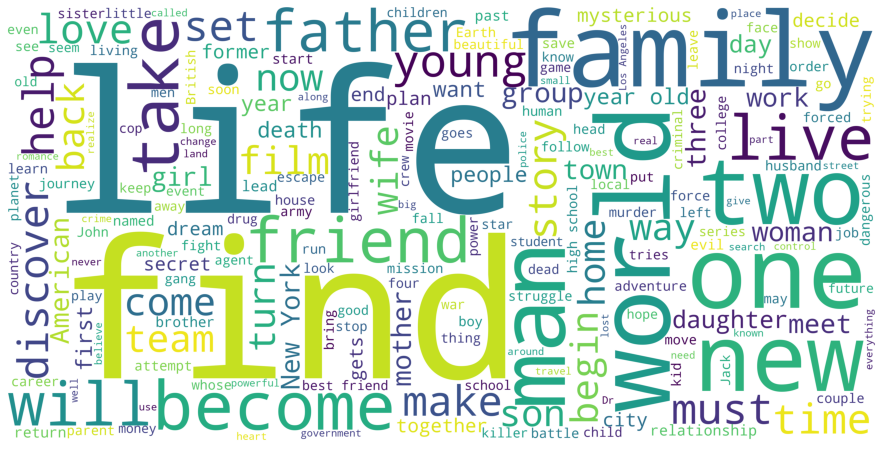

In [140]:
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

####Quais palavras são usadas em filmes com retorno acima de 5:

In [ ]:
df_return = df[df["return"] > 5]

In [ ]:
df_return.head()

In [ ]:
df_return["title"] = df["title"].astype("str")

In [ ]:
title_c = " ".join(df_return["title"])

In [ ]:
title_wordcloud_return_5 = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(title_c)

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud_return_5)
plt.axis('off')
plt.show()

###Quais são os idiomas que mais aparecem?



In [ ]:
lang_df = pd.DataFrame(df["original_language"].value_counts())
lang_df["language"] = lang_df.index 
lang_df.columns = ["number", 'language']
lang_df.head()

In [142]:
df["original_language"].nunique()

38

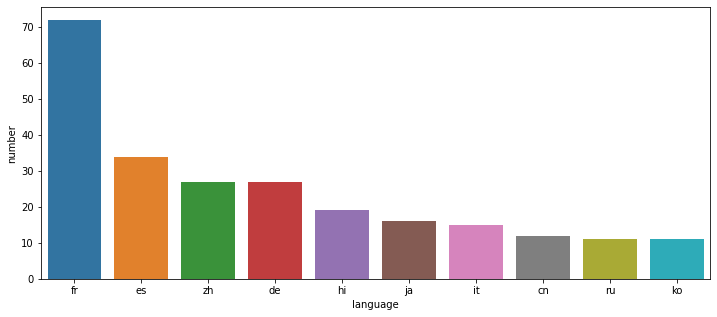

In [143]:
plt.figure(figsize=(12,5))
sns.barplot(x = "language", y = "number", data=lang_df[1:11])